<a href="https://colab.research.google.com/github/Hoshithatanimki19/Projects/blob/main/Creditcard_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#data preprocessing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Load the CSV file
file_path = '/content/drive/MyDrive/creditcard_2023.csv'
df = pd.read_csv(file_path)

In [11]:
df.shape

(568630, 31)

In [12]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [13]:
print("The name of the columns in the dataset are: ")
df.columns

The name of the columns in the dataset are: 


Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [14]:
df.dtypes

id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [15]:
# checking the number of missing values in each column
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [16]:
df_fraud = df[df.Class == 1]
df_true = df[df.Class == 0]
df_true = df_true.sample(frac=0.5)
data=pd.concat([df_true, df_fraud])
data=data.reset_index(drop=True)
data.shape

(426473, 31)

In [17]:
data.Amount.describe()

count    426473.00000
mean      12053.40128
std        6917.69999
min          50.01000
25%        6070.21000
50%       12054.33000
75%       18043.80000
max       24039.93000
Name: Amount, dtype: float64

In [18]:
duplicate_rows = df[df.duplicated()]
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found:")
    print(duplicate_rows)

No duplicate rows found.


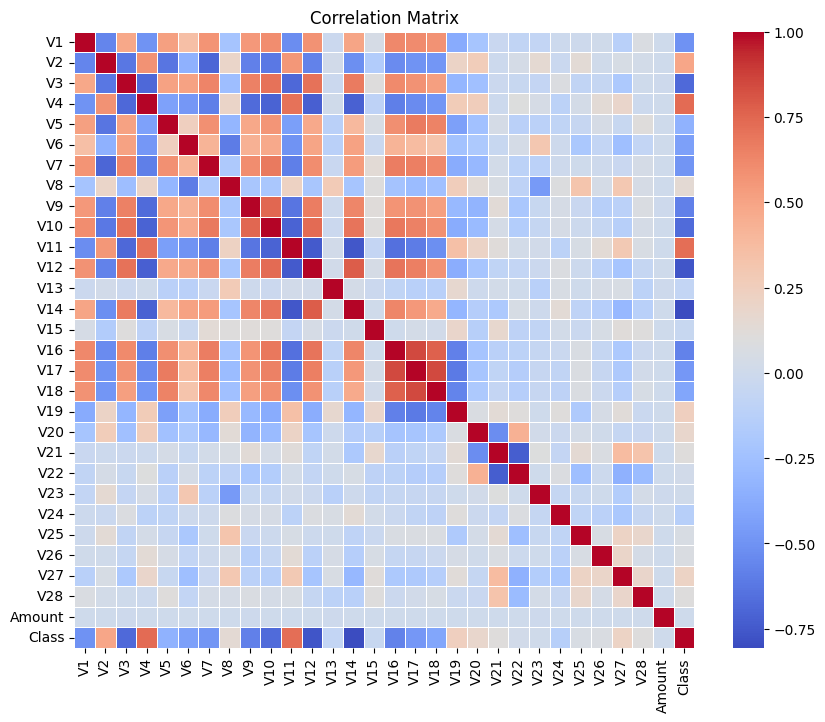

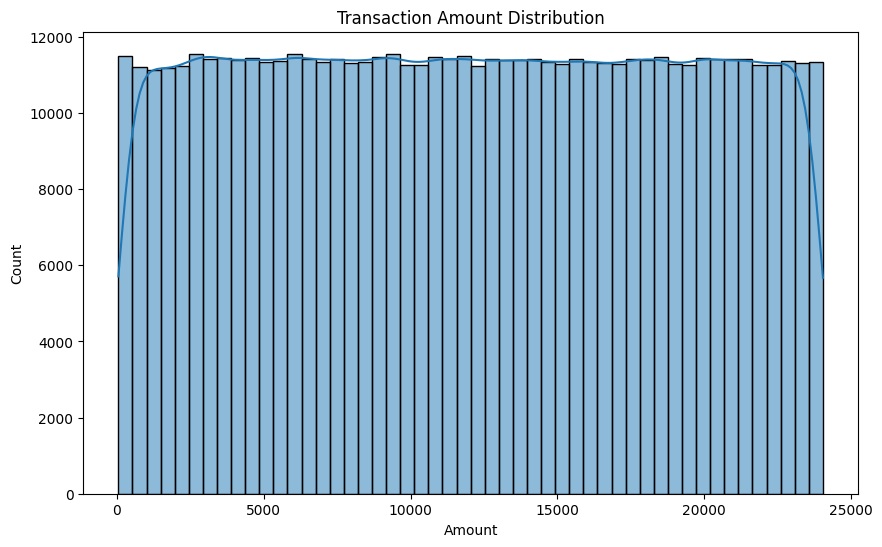

In [19]:
#cheking the correlation matrix and distribution of the amount.
df_without_id = df.drop('id', axis=1)

# Now, create the correlation matrix
corr_matrix = df_without_id.corr()

# Visualize the correlation matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Plot a histogram of the transaction amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

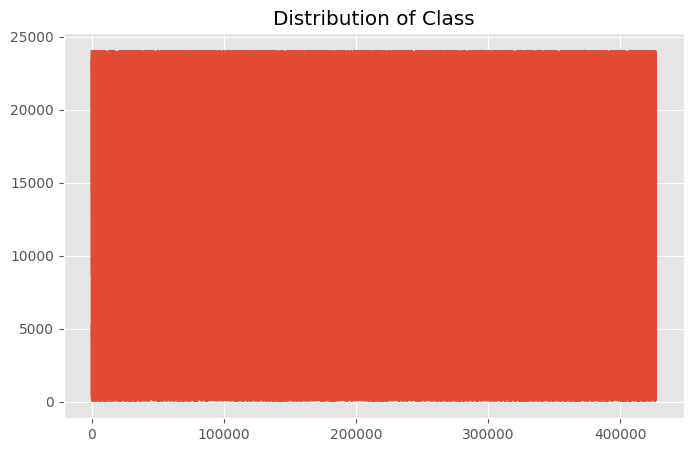

In [20]:
with plt.style.context(('ggplot')):
  plt.figure(figsize=(8,5))
  plt.title("Distribution of Class")
  plt.plot(data["Amount"])
  plt.show()

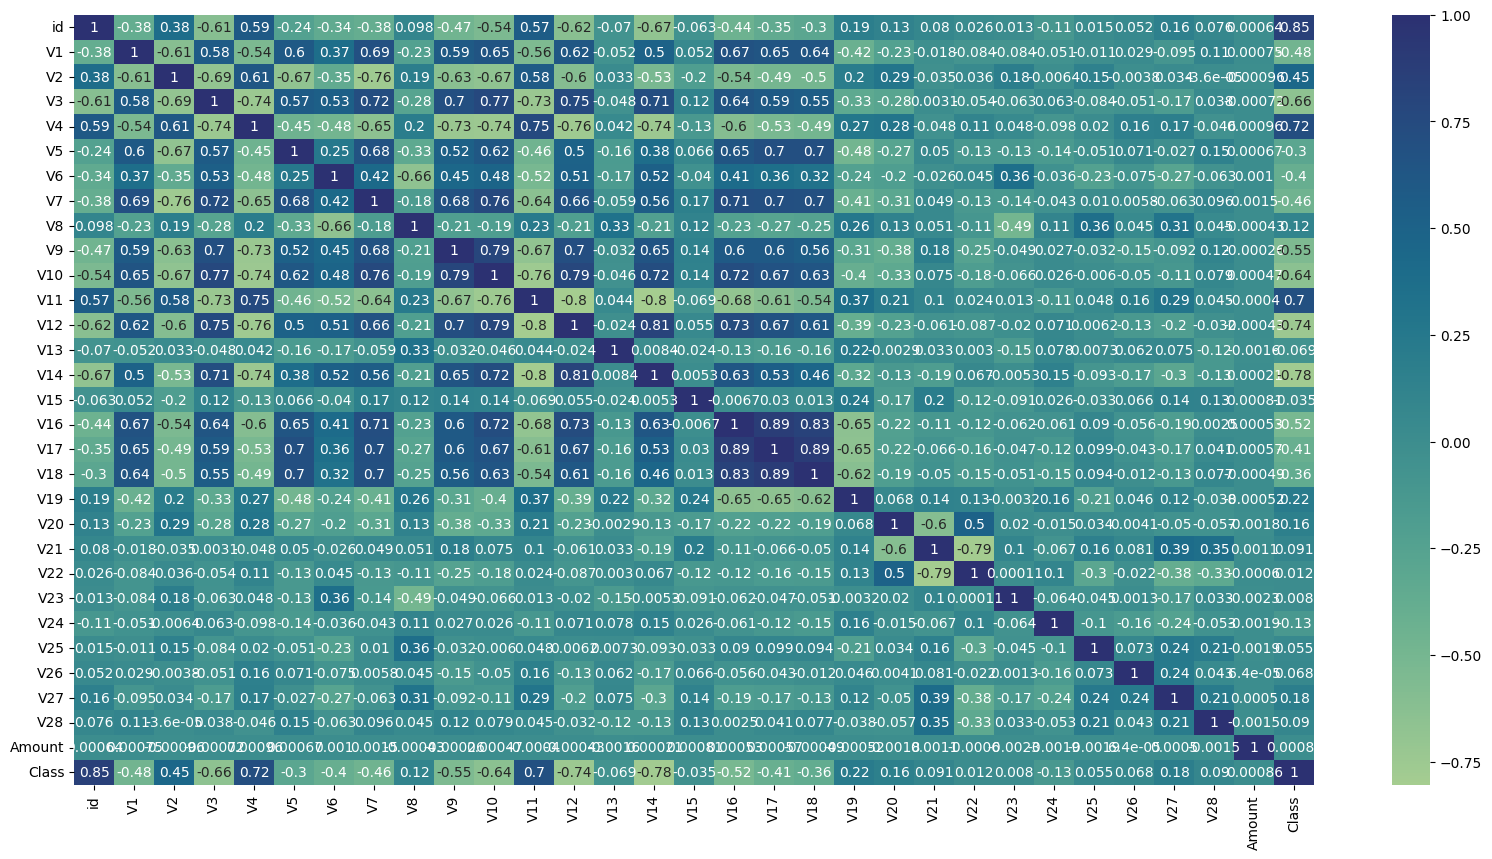

In [21]:
paper = plt.figure(figsize=[20,10])
sns.heatmap(data.corr(),cmap='crest',annot=True)
plt.show()

In [22]:
df.skew()

id       -6.579536e-16
V1       -8.341717e-02
V2       -1.397952e+00
V3        1.462221e-02
V4       -4.416893e-02
V5        1.506414e+00
V6       -2.016110e-01
V7        1.902687e+01
V8        2.999722e-01
V9        1.710575e-01
V10       7.404136e-01
V11      -2.089056e-02
V12       6.675895e-02
V13       1.490639e-02
V14       2.078348e-01
V15       1.123298e-02
V16       2.664070e-01
V17       3.730610e-01
V18       1.291911e-01
V19      -1.017123e-02
V20      -1.556460e+00
V21      -1.089833e-01
V22       3.185295e-01
V23      -9.968746e-02
V24       6.608974e-02
V25       2.300804e-02
V26      -1.895874e-02
V27       2.755452e+00
V28       1.724978e+00
Amount    1.655585e-03
Class     0.000000e+00
dtype: float64

<Axes: >

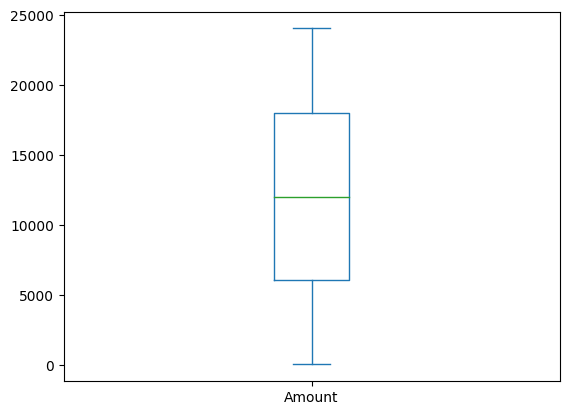

In [23]:
df['Amount'].plot.box()

<ipython-input-24-2ada823b135a>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data['Amount'], shade=True)


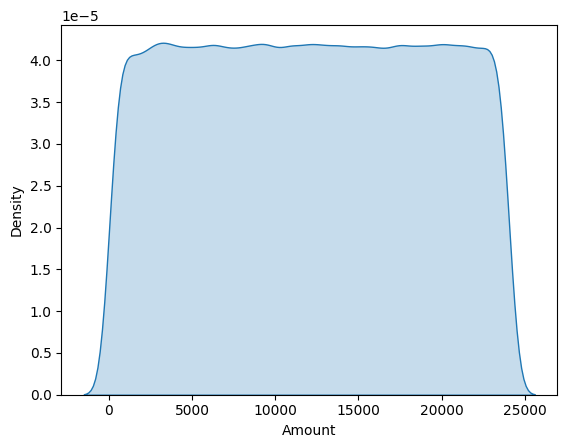

In [24]:
sns.kdeplot(data=data['Amount'], shade=True)
plt.show()

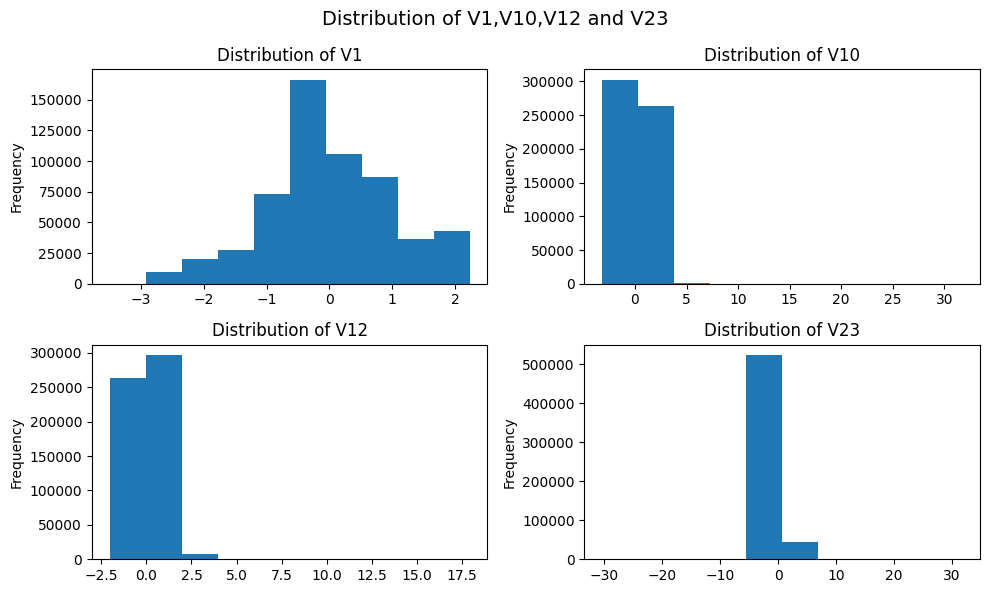

In [25]:
#Lets look at at features V1,V10,V23 and V12
# Lets plot a histogram
paper, axes = plt.subplots(2, 2, figsize=(10, 6))
df['V1'].plot(kind='hist', ax=axes[0,0], title='Distribution of V1')
df['V10'].plot(kind='hist', ax=axes[0,1], title='Distribution of V10')
df['V12'].plot(kind='hist', ax=axes[1,0], title='Distribution of V12')
df['V23'].plot(kind='hist', ax=axes[1,1], title='Distribution of V23')
plt.suptitle('Distribution of V1,V10,V12 and V23',size=14)
plt.tight_layout()
plt.show()

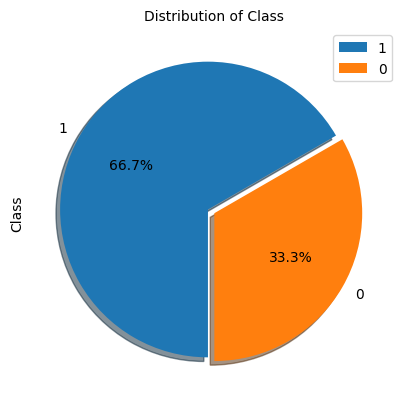

In [26]:
#Lets look at our Output feature
data['Class'].value_counts().plot.pie(explode=[0.05,0],autopct='%3.1f%%'
                                     ,shadow=True, legend= True,startangle =30)
plt.title('Distribution of Class',size=10)
plt.show()

In [27]:
#Data Preparation
# Lets prepare our data for our Model
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [28]:
#Lets devide our data into dependent and independent features
x = df.drop(['id','Class'],axis=1)
y = df.Class

In [29]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97


In [30]:
print('Shape of x',x.shape)
print('Shape of y',y.shape)

Shape of x (568630, 29)
Shape of y (568630,)


In [31]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression                 # To scaled data with mean 0 and variance 1
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.tree import DecisionTreeClassifier                     # To implement decision tree classifier
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [32]:
#Lets standardize all our features to bring them on a same scale.
#I have used standard scaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled_df = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285


In [33]:
# Modelling
# Lets Split our dataset into train and test
x_train,x_test,y_train,y_test = train_test_split(x_scaled_df,y,test_size=0.25,random_state=15,stratify= y)

In [34]:
#Lets see the shapes
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(426472, 29)
(142158, 29)
(426472,)
(142158,)


In [35]:
# Logistic regression Model
#Lets build a Logistic Regression Model
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [36]:
#Lets define a function for Checking Model Accuracy,Classification Report and Confusion Matrix
def model_eval(actual, predicted):
  acc_score = accuracy_score(actual, predicted)
  conf_matrix = confusion_matrix(actual, predicted)
  clas_rep = classification_report(actual, predicted)
  print('Model Accuracy is: ', round(acc_score, 2))
  print(conf_matrix)
  print(clas_rep)

In [37]:
preds_lr_train = lr.predict(x_train)
preds_lr_test = lr.predict(x_test)

In [38]:
# Evaluation matrix of train and test dataset
print('-------Training Accuracy---------')
model_eval(y_train,preds_lr_train)

-------Training Accuracy---------
Model Accuracy is:  0.97
[[208643   4593]
 [ 10330 202906]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97    213236
           1       0.98      0.95      0.96    213236

    accuracy                           0.97    426472
   macro avg       0.97      0.97      0.97    426472
weighted avg       0.97      0.97      0.97    426472



In [39]:
print('-------Test Accuracy---------')
model_eval(y_test, preds_lr_test)

-------Test Accuracy---------
Model Accuracy is:  0.96
[[69545  1534]
 [ 3520 67559]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     71079
           1       0.98      0.95      0.96     71079

    accuracy                           0.96    142158
   macro avg       0.96      0.96      0.96    142158
weighted avg       0.96      0.96      0.96    142158



In [40]:
# Decision Tree
# Lets build Decision tree Model and fit
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
preds_dtree_train = dtree.predict(x_train)
preds_dtree_test = dtree.predict(x_test)

In [42]:
print('-------Training Accuracy---------')
model_eval(y_train,preds_dtree_train)

-------Training Accuracy---------
Model Accuracy is:  1.0
[[213236      0]
 [     0 213236]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       1.00      1.00      1.00    213236

    accuracy                           1.00    426472
   macro avg       1.00      1.00      1.00    426472
weighted avg       1.00      1.00      1.00    426472



In [43]:
print('-------Testing Accuracy---------')
model_eval(y_test,preds_dtree_test)

-------Testing Accuracy---------
Model Accuracy is:  1.0
[[70876   203]
 [   84 70995]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       1.00      1.00      1.00     71079

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

In [ ]:
preds_rf_train = rf.predict(x_train)
preds_rf_test = rf.predict(x_test)

In [ ]:
print('-------Training Accuracy---------')
model_eval(y_train, preds_rf_train)

In [ ]:
print('-------Testing Accuracy---------')
model_eval(y_test, preds_rf_test)

In [ ]:
import xgboost as xgb
xgclf = xgb.XGBRFClassifier()
xgclf.fit(x_train,y_train)

In [ ]:
preds_xgb_train = xgclf.predict(x_train)
preds_xgb_test = xgclf.predict(x_test)

In [ ]:
print('-------Training Accuracy---------')
model_eval(y_train,preds_xgb_train)

In [ ]:
print('-------Test Accuracy---------')
model_eval(y_test,preds_xgb_test)

In [ ]:
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Hyerparamter tuning for XGBoost
param_dist_xgb = {
    'n_estimators': [50,100,150,200,300,400],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6]
}
xgb_clf = RandomizedSearchCV(xgclf,param_dist_xgb,verbose = 2)
xgb_clf.fit(x_train,y_train)

In [ ]:
#Best Hyper paramters for XG Boost
print('Best Parameters for XG Boost :',xgb_clf.best_params_)


In [ ]:
# Building Model ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=128, activation='elu'))
model.add(Dense(units=64, activation='elu'))
model.add(Dense(units=32, activation='elu'))
model.add(Dense(units=8, activation='elu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile and Training

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs = 5)

In [ ]:
y_pred = model.predict(sc.transform(x_test))
from sklearn.metrics import classification_report
y_pred = (y_pred>0.5)
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")